In [6]:
import pandas as pd
import numpy as np
import xlrd

In [46]:
_df = pd.read_excel("lead_ranking_data.xlsx")

In [60]:
_df.head()

0    website
1    website
2    website
3    website
4    website
Name: LeadCategory, dtype: object

In [54]:
_df.isna().sum()

City                             91463
Comment                         120397
ContactId                           10
Country                          85743
Email                             3051
ExistingContact                 124334
FollowUpdate                      2433
HighestQualification            151481
InteractionsBeforeEnrollment    141434
LeadCampaign                    142768
LeadCategory                         0
LeadSource                           0
LeadSubCategory                      0
Mobile                          101712
Motivation                      151392
OnlinePreviousExperiance        145259
OwnerId                              0
PostalCode                       80548
PreviousCourseCompleted         145327
Program                          17204
ProgramType__Lead               100300
SearchEngine                    141306
SearchKeyword                   141501
StateOrProvince                  97593
Status                               0
Telephone                

In [53]:
_df.LeadCategory=_df.LeadCategory.fillna("Other")
_df.LeadSubCategory=_df.LeadSubCategory.fillna("Other")
_df.LeadSource=_df.LeadSource.fillna("Other")


In [57]:
_df.LeadCategory=_df.LeadCategory.str.lower()
_df.LeadSubCategory=_df.LeadSubCategory.str.lower()
_df.LeadSource=_df.LeadSource.str.lower()

In [64]:
print(_df.LeadCategory.value_counts())
print(_df.LeadSubCategory.value_counts())
print(_df.LeadSource.value_counts())

website              52351
other                27004
search               25987
aggregate            20214
email/social/alum    18677
field                 7269
partner                548
media                  375
affiliate                7
Name: LeadCategory, dtype: int64
request                 31030
other                   28186
ppc                     25447
cpl                     20214
application             15827
purchased               12494
conference               3643
social                   3396
webinar                  2763
referral                 2354
ec referral              1765
district program         1707
ambassador referral      1283
alumni referral          1238
nise                      532
house                     216
display                   113
organic                    83
banner                     80
radio                      29
outdoor                    21
climb credit                6
classesusa                  2
tv                          1
web 

In [11]:
target = _df.iloc[:,-1]

In [12]:
target.head()

0    False
1    False
2    False
3    False
4     True
Name: Is_mobileno_given, dtype: bool

In [65]:
_df["Is_mobileno_given"] = ~_df["Mobile"].isnull()

In [66]:
_df["Is_telephoneno_given"] = ~_df["Telephone"].isnull()

In [67]:
_df["DND_Count"]=_df[["donotemail", "donotfax", "donotphone"]].apply(lambda x: sum([1 if x["donotfax"] == True else 0, 1 if x["donotphone"] == True else 0, 1 if x["donotemail"] == True else 0]), axis=1)

In [68]:
_df["DND_Count"].value_counts()

0    149471
1      2676
2       285
Name: DND_Count, dtype: int64

In [69]:
_df["Is_pref_start_date_given"] = ~_df["po_prefered_start_date1"].isnull()

In [71]:
_df.columns

Index(['City', 'Comment', 'ContactId', 'Country', 'Email', 'ExistingContact',
       'FollowUpdate', 'HighestQualification', 'InteractionsBeforeEnrollment',
       'LeadCampaign', 'LeadCategory', 'LeadSource', 'LeadSubCategory',
       'Mobile', 'Motivation', 'OnlinePreviousExperiance', 'OwnerId',
       'PostalCode', 'PreviousCourseCompleted', 'Program', 'ProgramType__Lead',
       'SearchEngine', 'SearchKeyword', 'StateOrProvince', 'Status',
       'Telephone', 'confirminterest', 'createdby', 'createdon', 'donotemail',
       'donotfax', 'donotphone', 'firstname', 'fullname', 'lastname', 'leadid',
       'leadqualitycode', 'modifiedby', 'modifiedon',
       'po_prefered_start_date1', 'CreatedBy', 'CreatedDate', 'ModifiedBy',
       'ModifiedDate', 'ProgramId', 'ProgramName', 'ProgramType__Program',
       'Is_mobileno_given', 'Is_telephoneno_given', 'DND_Count',
       'Is_pref_start_date_given'],
      dtype='object')

In [158]:
_selected_fields = ['LeadCategory',
'LeadSource',
'LeadSubCategory',
'Is_mobileno_given',
# 'Is_telephoneno_given',
'DND_Count',
# 'Is_pref_start_date_given',
 'Status'
]

In [159]:
for _col in _selected_fields:
    print(_col, _df[_col].dtype)


LeadCategory int64
LeadSource int64
LeadSubCategory int64
Is_mobileno_given int64
DND_Count int64
Status int64


In [160]:
_df = _df[_selected_fields]

In [141]:
# _df.ProgramType__Program.value_counts()

In [142]:
_df.count()

LeadCategory                152432
LeadSource                  152432
LeadSubCategory             152432
Is_mobileno_given           152432
DND_Count                   152432
Is_pref_start_date_given    152432
Status                      152432
dtype: int64

In [143]:
_df[_df.LeadCategory.isna()].head()

,LeadCategory,LeadSource,LeadSubCategory,Is_mobileno_given,DND_Count,Is_pref_start_date_given,Status


In [144]:
# _df['ProgramType__Program'].value_counts()

In [145]:
_df.dtypes

LeadCategory                int64
LeadSource                  int64
LeadSubCategory             int64
Is_mobileno_given           int64
DND_Count                   int64
Is_pref_start_date_given    int64
Status                      int64
dtype: object

In [146]:
# df = pd.DataFrame(np.random.randn(100, 2))

# msk = np.random.rand(len(df)) < 0.8
# train = df[msk]
# test = df[~msk]

In [147]:
for i in ['LeadCategory','LeadSource','LeadSubCategory']:
    _df[i]=_df[i].fillna('Nan')

In [148]:
_df.isna().sum()

LeadCategory                0
LeadSource                  0
LeadSubCategory             0
Is_mobileno_given           0
DND_Count                   0
Is_pref_start_date_given    0
Status                      0
dtype: int64

In [161]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
_df = _df.apply(le.fit_transform)
# le.fit(_df.LeadSubCategory)
# le.classes_

In [162]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
np.random.seed(7)

In [163]:
_df.head()

,LeadCategory,LeadSource,LeadSubCategory,Is_mobileno_given,DND_Count,Status
0,8,9,19,0,0,1
1,8,9,25,0,0,1
2,8,9,19,0,0,0
3,8,9,2,0,0,0
4,8,9,2,1,0,1


In [164]:
_df.describe()

,LeadCategory,LeadSource,LeadSubCategory,Is_mobileno_given,DND_Count,Status
count,152432.000000,152432.000000,152432.000000,152432.000000,152432.000000,152432.000000
mean,5.378792,6.245946,13.521465,0.332739,0.021295,0.774345
std,2.655539,2.886144,6.225855,0.471195,0.156783,0.418014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,7.000000,0.000000,0.000000,1.000000
50%,7.000000,8.000000,16.000000,0.000000,0.000000,1.000000
75%,8.000000,9.000000,19.000000,1.000000,0.000000,1.000000
max,8.000000,9.000000,25.000000,1.000000,2.000000,1.000000


# Traditional Way oF RF

In [165]:
from sklearn.model_selection import train_test_split
feature_names = _df.columns[:-1] 
# target_names = df.columns[-1:]
X_train, X_test, y_train, y_test = train_test_split(_df.ix[:,0:-1], _df.ix[:,-1:], test_size=0.20, random_state=42)

/home/maheshdivakaran/anaconda3/envs/suyati/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [167]:
clf = RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=13)

In [168]:
clf.fit(X_train, y_train)

/home/maheshdivakaran/anaconda3/envs/suyati/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [169]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

LeadSubCategory      0.471655
LeadSource           0.296287
LeadCategory         0.221848
Is_mobileno_given    0.009420
DND_Count            0.000791
dtype: float64

In [170]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
# prediction on test set
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))


Accuracy: 0.8000131203463772


In [180]:
import pickle
# now you can save it to a file
with open('leadranking_rf.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [179]:
clf.predict_proba([[1, 2 ,2 ,0,0]])

array([[0.13897738, 0.86102262]])

In [55]:
y_train.head()

,Status
2827,1
74571,1
19242,1
13836,1
139754,1


In [61]:
_df

,LeadCategory,LeadSource,LeadSubCategory,Is_mobileno_given,Is_telephoneno_given,DND_Count,Is_pref_start_date_given,ProgramType__Program,Status
0,9,13,20,0,0,0,0,6,1
1,9,13,26,0,0,0,0,262,1
2,9,13,20,0,0,0,0,6,0
3,9,13,2,0,0,0,0,0,0
4,9,13,2,1,0,0,0,0,1


# Decision Tree


In [102]:
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(_df.ix[:,0:-1], _df.ix[:,-1:], test_size=0.20, random_state=42)

In [135]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [136]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("ACE") 

'ACE.pdf'

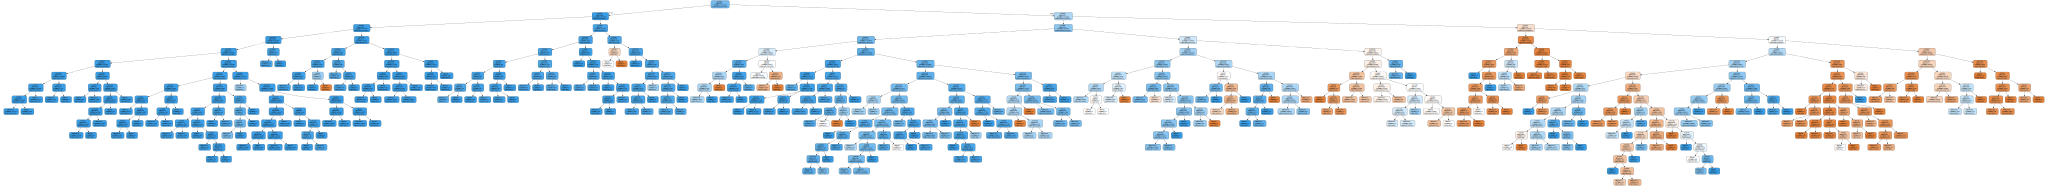

In [108]:
dot_data = tree.export_graphviz(clf, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [110]:
y_pred = clf.predict(X_test) 

In [111]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  


[[ 3446  3400]
 [ 1695 21946]]
             precision    recall  f1-score   support

          0       0.67      0.50      0.57      6846
          1       0.87      0.93      0.90     23641

avg / total       0.82      0.83      0.82     30487



In [ ]:
 score(X_test, y, sample_weight=None)[source]

In [120]:
import sklearn.metrics
print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.8328795880211237


# Decesion Regressor


In [121]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [122]:
y_pred = regressor.predict(X_test)  

In [124]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.21773844181996396
Mean Squared Error: 0.10969479149365348
Root Mean Squared Error: 0.3312020402921055


# Using h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

In [ ]:
# Load data into H2O
df = h2o.import_file('LeadRanking_h20.csv')

In [ ]:
df.describe()

In [ ]:
slice = int(len(df)*0.7)
train = df[0:slice,:]
test = df[slice:,:]

y='Status'
x = df.columns
x = x.remove(y)

In [ ]:
train.head(5)

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x=x, y =y, training_frame=train, leaderboard_frame = test)

In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head(rows=lb.nrows)

In [ ]:
print('Generate predictions...')
train.drop(['Status'])
y_pred = aml.leader.predict(train)
# preds = preds.as_data_frame()
# preds
y_pred

In [ ]:
pd = y_pred.as_data_frame()
pd_train = train.as_data_frame()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
# prediction on test set
# y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(pd['predict'].tolist(), pd_train['Status'].tolist()))